<a href="https://colab.research.google.com/github/greapis/jaeha-shim/blob/main/Second%20ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [12]:
print(tf.__version__)

2.15.0


In [13]:
# We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST.
  # It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image

  #  The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

mnist = tf.keras.datasets.fashion_mnist

In [14]:
# Calling load_data on this object will give you two sets of two lists,
# these will be the training and testing values for the graphics that contain the clothing items and their labels.

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

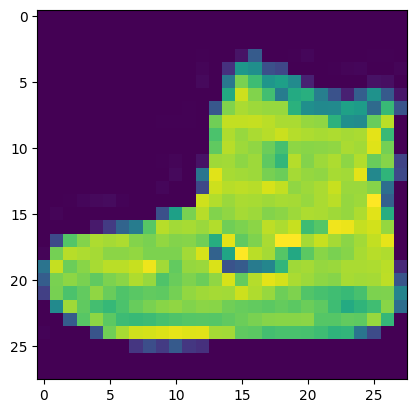

In [15]:
# Let's print a training image, and a training label to see...Experiment with different indices in the array.

import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [16]:
# You'll notice that all of the values in the number are between 0 and 255
#  If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'

# Fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
# Let's now design the model.

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Sequential: That defines a SEQUENCE of layers in the neural network

# Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

# Dense: Adds a layer of neurons

# Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

# Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

# Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4969 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3137 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [19]:
# we have the test images. We can call model.evaluate, and pass in the two sets,
# and it will report back the loss for each. Let's give it a try:

model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8791


[0.35476216673851013, 0.8791000247001648]

In [20]:
# Example 1

# It creates a set of classifications for each of the test images, and
# then prints the first entry in the classifications.

classifications = model.predict(test_images)

print(classifications[0])


313/313 [==============================] - 1s 1ms/step
[4.6946735e-09 1.1685120e-09 6.3832362e-10 2.4805683e-12 7.0851498e-11
 7.1860472e-05 6.5288987e-08 3.3854740e-03 1.6893034e-06 9.9654096e-01]


In [21]:
print(test_labels[0])

9


In [22]:
# Exercise 2:
# Let's now look at the layers in your model.
# Experiment with different values for the dense layer with 512 neurons.
# What different results do you get for loss, training time etc? Why do you think that's the case?p

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


2.15.0
Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4712
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3592
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3233
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2982
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[7.9366237e-06 3.5995026e-08 1.2589182e-08 1.8963739e-08 2.3963224e-08
 1.7114580e-02 1.2675077e-06 8.8120617e-02 9.7955735e-06 8.9474565e-01]
9


In [23]:
# Exercise 3:
# What would happen if you remove the Flatten() layer. Why do you think that's the case?

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)


model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


2.15.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5223
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3939
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3537
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3301
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[1.0531872e-06 5.4142490e-09 3.0437634e-06 2.2362062e-07 4.3454529e-06
 2.0305289e-02 9.9292492e-06 5.2204547e-03 7.1631592e-05 9.7438389e-01]
9


In [24]:
# Exercise 4:
# Consider the final (output) layers. Why are there 10 of them?
# What would happen if you had a different amount than 10? For example, try training the network with 5

# You get an error as soon as it finds an unexpected value.
# Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for.
# In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.


import tensorflow as tf
print(tf.__version__)


mnist = tf.keras.datasets.fashion_mnist


(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


2.15.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5207
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3952
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3547
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3283
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.6466814e-05 1.9623918e-08 4.3432917e-07 4.0068181e-07 4.5800822e-05
 9.8027252e-02 4.6429886e-05 6.5194353e-02 7.3568095e-05 8.3659530e-01]
9


In [25]:
# Exercise 5:
# Consider the effects of additional layers in the network.
# What will happen if you add another layer between the one with 512 and the final layer with 10.

# Ans: There isn't a significant impact --
# because this is relatively simple data.
# For far more complex data (including color images to be classified as flowers that you'll see in the next lesson),
# extra layers are often necessary.


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])



2.15.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4653
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3520
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3180
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2940
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.3312468e-11 1.6758581e-11 1.6410331e-10 4.9044740e-10 3.4204153e-10
 3.2302262e-06 1.2333939e-09 2.0886443e-03 2.3748581e-10 9.9790812e-01]
9


In [26]:
# Exercise 6:
# Consider the impact of training for more or less epochs. Why do you think that would be the case?

# Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs
# you might see the loss value stops decreasing, and sometimes increases.
# This is a side effect of something called 'overfitting' which you can learn about [somewhere] and
# it's something you need to keep an eye out for when training neural networks.
# There's no point in wasting your time training if you aren't improving your loss, right! :)



import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, trainig_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5012
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3765
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3412
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3151
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2720
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2400
Epoch 11/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2326
Epoch 12/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0

In [27]:
# Exercise 7:
# Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1.
# What would be the impact of removing that? Here's the complete code to give it a try.
# Why do you think you get different results?


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# To experiment with removing normalization, comment out the following 2 lines

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])



2.15.0
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4721
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3615
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3221
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2964
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[6.5043508e-07 4.6193685e-10 1.8106814e-08 3.6484407e-10 1.5028701e-07
 7.8341377e-04 2.4294252e-07 1.2003119e-02 1.5524978e-06 9.8721087e-01]
9


In [28]:
# Exercise 8:
# Earlier when you trained for extra epochs you had an issue where your loss might change.
# It might have taken a bit of time for you to wait for the training to do that, and
# you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?'
# -- i.e. 95% accuracy might be enough for you, and
# if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....
# So how would you fix that? Like any other program...you have callbacks! Let's see them in action.



import tensorflow as tf
print(tf.__version__)


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoh, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\Reached 90% accuracy so cacelling training!")
      self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),  (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])



2.15.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4767 - accuracy: 0.8294
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3574 - accuracy: 0.8697
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3217 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2967 - accuracy: 0.8908
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2780 - accuracy: 0.8961
